# Tennis Project

This purpose of this task is to predict a future ATP ‘Top 10’ singles player.
I have decided to view this as a binary classification problem, and therefore, having found an online dataset of all past ATP matches, created a logistic regression model. 

# Data

Source: https://github.com/JeffSackmann/tennis_atp   
This includes all ATP matches from Jan 1991 to Feb 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
player_file = pd.read_csv("data/tennis_atp-master/atp_players.csv")

In [3]:
match_file_list= !ls cd "data/tennis_atp-master"

In [4]:
match_sing_list=[]
for file in match_file_list:
    if file[0:13]=="atp_matches_1":
        match_sing_list.append(file)
    elif file[0:13]=="atp_matches_2":
        match_sing_list.append(file)

In [5]:
match_list = []
df_names = []
for file in match_sing_list:
    year = int(file[-8:].strip(".csv"))
    name = f"df_{year}"
    if year >1990:
        match_list.append(file)
        df_names.append(name)

In [6]:
matches_dict = {name: pd.read_csv(f"data/tennis_atp-master/{file}") for name,file in zip(df_names,match_list)}

### View info

In [7]:
df_1991 = matches_dict["df_1991"]
df_2015 = matches_dict["df_2015"]

In [8]:
df_1991.shape

(3727, 49)

In [9]:
df_1991.isna().sum()

tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           2307
winner_entry          3253
winner_name              0
winner_hand              0
winner_ht              120
winner_ioc               0
winner_age              23
loser_id                 0
loser_seed            2943
loser_entry           3018
loser_name               0
loser_hand               0
loser_ht               207
loser_ioc                0
loser_age               31
score                    0
best_of                  0
round                    0
minutes                490
w_ace                  491
w_df                   491
w_svpt                 491
w_1stIn                491
w_1stWon               491
w_2ndWon               491
w_SvGms                491
w_bpSaved              491
w_bpFaced              491
l_ace                  491
l

In [10]:
df_2015.isna().sum()

tourney_id               0
tourney_name             0
surface                  0
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1594
winner_entry          2617
winner_name              0
winner_hand              1
winner_ht              120
winner_ioc               0
winner_age               0
loser_id                 0
loser_seed            2241
loser_entry           2333
loser_name               0
loser_hand               3
loser_ht               260
loser_ioc                0
loser_age                0
score                    0
best_of                  0
round                    0
minutes               1581
w_ace                  323
w_df                   323
w_svpt                 323
w_1stIn                323
w_1stWon               323
w_2ndWon               323
w_SvGms                323
w_bpSaved              323
w_bpFaced              323
l_ace                  323
l

In [11]:
df_1991.tourney_name.unique()

array(['Adelaide', 'Wellington', 'Auckland', 'Sydney Outdoor',
       'Australian Open', 'Davis Cup G1 QF: BRA vs PER',
       'Davis Cup G1 QF: DEN vs MAR', 'Davis Cup G1 QF: HUN vs URS',
       'Davis Cup G1 QF: POL vs ROU', 'Davis Cup G1 QF: POR vs IRL',
       'Davis Cup G2 R1: BAH vs CRC', 'Davis Cup G2 R1: BOL vs BAR',
       'Davis Cup G2 R1: ECA vs GUA', 'Davis Cup G2 R1: ESA vs DOM',
       'Davis Cup G2 R1: HAI vs VEN', 'Davis Cup G2 R1: JAM vs COL',
       'Davis Cup G2 R1: KEN vs CGO', 'Davis Cup G2 R1: TRI vs ECU',
       'Davis Cup G2 R1: ZAM vs CMR', 'Davis Cup WG R1: AUS vs BEL',
       'Davis Cup WG R1: ESP vs CAN', 'Davis Cup WG R1: GER vs ITA',
       'Davis Cup WG R1: NZL vs ARG', 'Davis Cup WG R1: TCH vs AUT',
       'Davis Cup WG R1: YUG vs SWE', 'Guaruja', 'Milan', 'San Francisco',
       'Davis Cup G1 PR: THA vs IND', 'Brussels', 'Philadelphia',
       'Memphis', 'Stuttgart Indoor', 'Chicago', 'Rotterdam',
       'Copenhagen', 'Indian Wells Masters', 'Miami Mast

In [12]:
df_1991.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

## Cleaning

- remove Davis Cup events since team sport and no detailed match data here
- Laver cup not present in data
- Olympics can remain since played as singles event 

In [13]:
def remove_team_events(df):
    df_team_removed = df[df["tourney_name"].map(lambda x: x[:9]!="Davis Cup")]
    return df_team_removed


In [14]:
#dictionary with dataframe for each year

matches_dict_no_team={}
for df in df_names:
    matches_dict_no_team[df]=remove_team_events(matches_dict[df])

In [15]:
matches_dict_clean = matches_dict_no_team

## Combine

In [16]:
#combine all dataframes across all years into one
combined_df = pd.concat(matches_dict_clean.values(), ignore_index=True)
combined_df.shape

(90659, 49)

In [17]:
#search for null values
combined_df.isna().sum()

tourney_id                0
tourney_name              0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           50286
winner_entry          78592
winner_name               0
winner_hand               0
winner_ht              1044
winner_ioc                0
winner_age                0
loser_id                  0
loser_seed            68554
loser_entry           70721
loser_name                0
loser_hand                0
loser_ht               2687
loser_ioc                 0
loser_age                22
score                     0
best_of                   0
round                     0
minutes                4313
w_ace                  1726
w_df                   1726
w_svpt                 1726
w_1stIn                1726
w_1stWon               1726
w_2ndWon               1726
w_SvGms                1725
w_bpSaved              1726
w_bpFaced           

In [18]:
#add extra columns for certain wins
combined_df["top_10_win"]=combined_df.loser_rank<=10
combined_df["top_50_win"]=combined_df.loser_rank<=50
combined_df["top_100_win"]=combined_df.loser_rank<=100

In [19]:
combined_df = combined_df.sort_values(by="tourney_date").reset_index().drop(columns=["index"])
combined_df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,top_10_win,top_50_win,top_100_win
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,NaN,NaN,...,16.0,6.0,8.0,56.0,NaN,2.0,NaN,True,True,True
1,1991-354,Wellington,Hard,32,A,19901231,3,101432,NaN,Q,...,14.0,7.0,16.0,172.0,NaN,249.0,NaN,False,False,False
2,1991-354,Wellington,Hard,32,A,19901231,4,101439,8.0,NaN,...,13.0,4.0,10.0,70.0,NaN,263.0,NaN,False,False,False
3,1991-354,Wellington,Hard,32,A,19901231,5,101735,3.0,NaN,...,10.0,7.0,13.0,32.0,NaN,103.0,NaN,False,False,False
4,1991-354,Wellington,Hard,32,A,19901231,6,101119,NaN,NaN,...,9.0,4.0,8.0,83.0,NaN,90.0,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90654,2022-0506,Buenos Aires,Clay,32,A,20220207,273,200175,NaN,NaN,...,12.0,3.0,7.0,64.0,971.0,56.0,1076.0,False,False,True
90655,2022-0506,Buenos Aires,Clay,32,A,20220207,275,202104,NaN,WC,...,10.0,3.0,6.0,74.0,866.0,88.0,742.0,False,False,True
90656,2022-0506,Buenos Aires,Clay,32,A,20220207,277,106329,NaN,NaN,...,9.0,1.0,5.0,104.0,680.0,32.0,1499.0,False,True,True
90657,2022-0407,Rotterdam,Hard,32,A,20220207,297,126774,1,NaN,...,10.0,9.0,12.0,4.0,7145.0,34.0,1486.0,False,True,True


In [20]:
combined_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,top_10_win,top_50_win,top_100_win
0,1991-339,Adelaide,Hard,32,A,19901231,1,101723,NaN,NaN,...,16.0,6.0,8.0,56.0,NaN,2.0,NaN,True,True,True
1,1991-354,Wellington,Hard,32,A,19901231,3,101432,NaN,Q,...,14.0,7.0,16.0,172.0,NaN,249.0,NaN,False,False,False
2,1991-354,Wellington,Hard,32,A,19901231,4,101439,8.0,NaN,...,13.0,4.0,10.0,70.0,NaN,263.0,NaN,False,False,False
3,1991-354,Wellington,Hard,32,A,19901231,5,101735,3.0,NaN,...,10.0,7.0,13.0,32.0,NaN,103.0,NaN,False,False,False
4,1991-354,Wellington,Hard,32,A,19901231,6,101119,NaN,NaN,...,9.0,4.0,8.0,83.0,NaN,90.0,NaN,False,False,True


## Unique Players

Transform data from match basis to player basis

### Model data

This is data used for testing the main model.   
Select data based on each player's first 26 matches.

In [21]:
winner_df = combined_df[["winner_id","winner_name","winner_rank","tourney_date"]]
loser_df = combined_df[["loser_id","loser_name","loser_rank","tourney_date"]]
winner_df1=winner_df.rename(columns={"winner_id": "player_id", 
                                     "winner_name": "player",
                                     "winner_rank":"rank"})
loser_df1=loser_df.rename(columns={"loser_id": "player_id", 
                                   "loser_name": "player",
                                   "loser_rank":"rank"})


In [22]:
all_players = pd.concat((winner_df1,loser_df1),axis=0).reset_index().drop(columns="index")
all_players.shape

(181318, 4)

In [23]:
#highest rank
players_list = all_players.groupby("player_id")[["player","rank"]].min()
players_list.reset_index(inplace=True)
#number of matches
players_list["no_matches"]=all_players.groupby("player_id")[["player","rank"]].count().reset_index().player
players_list.rename(columns={"rank":"highest_rank"},inplace=True)

In [24]:
players_list.head()

,player_id,player,highest_rank,no_matches
0,100282,Guillermo Vilas,410.0,2
1,100284,Jimmy Connors,33.0,83
2,100286,Harold Solomon,1029.0,1
3,100321,Vijay Amritraj,NaN,1
4,100431,Mansour Bahrami,1047.0,2


In [25]:
#select players with n number of matches
n=26
players_df = players_list[players_list.no_matches>n].reset_index().drop(columns=["index"])
players_df.head()

,player_id,player,highest_rank,no_matches
0,100284,Jimmy Connors,33.0,83
1,100529,Kevin Curren,49.0,68
2,100581,John McEnroe,12.0,101
3,100628,Michiel Schapers,55.0,65
4,100644,Alexander Zverev,3.0,445


### Predict data

Select potential players who have: 
- recently joined the tour
- have never been in top 50
- not currently in top 100
- have played at least 5 matches

In [26]:
#start year
from_year = 2018
all_potentials = all_players.copy()
all_potentials["start_year"]=all_potentials.tourney_date.map(lambda x: int(str(x)[0:4]))
all_potentials = all_potentials.sort_values(by="tourney_date")
potentials_list = all_potentials.groupby("player_id")[["player","rank","start_year"]].min()


In [27]:
#get current ranking
current = []
for index,player in enumerate(potentials_list.player):
    current.append(list(all_potentials[all_potentials.player==player]["rank"])[-1])

In [28]:
potentials_list["current_rank"] = current

In [29]:
#number of matches
no_matches=list(all_potentials.groupby("player_id")[["player","rank"]].count().reset_index().player)
potentials_list["no_matches"]=no_matches
potentials_list.rename(columns={"rank":"highest_rank"},inplace=True)

In [30]:
#never in top 50, not in top 100, at least 5
potentials_top = potentials_list[potentials_list.highest_rank>50]
potentials_current = potentials_top[potentials_top.current_rank>100]
potentials_year = potentials_current[potentials_current.start_year>=from_year]
potentials_n = potentials_year[potentials_year.no_matches>5]
potentials_df=potentials_n.reset_index()
potentials_df.head()

,player_id,player,highest_rank,start_year,current_rank,no_matches
0,105432,Prajnesh Gunneswaran,84.0,2018,228.0,28
1,105933,Roberto Quiroz,244.0,2018,293.0,6
2,106072,Alexey Vatutin,138.0,2018,197.0,6
3,106110,Filip Horansky,164.0,2018,185.0,8
4,106120,Ricardo Ojeda Lara,198.0,2018,206.0,6


## Player Stats

Calculate statistics for each player based on first n games

### Model data

In [31]:
win_pc = []
top10_win_pc = []
top50_win_pc = []
top100_win_pc = []
first_rank=[]
n_rank=[]
change_rank=[]
bp_conv_rate=[]
bp_saved_rate=[]
ace_df_ratio=[]
first_serve_pc=[]
first_serve_won_pc=[]
second_serve_won_pc=[]

for index,player in enumerate(players_df.player):
    #all matches per player
    condition = (combined_df["winner_name"] ==player)|(combined_df["loser_name"]==player)
    all_matches = combined_df[condition]
    
    #select first n matches from 1991
    first_n_matches = all_matches.head(n).copy()
    first_n_matches.reset_index(inplace=True)
    first_n_matches["win"] = first_n_matches.winner_name==player
    first_n_matches["loss"] = first_n_matches.loser_name==player

    #wins
    win_pc.append(first_n_matches.win.sum()/n)
    top10_win_pc.append(first_n_matches.top_10_win.sum()/n)
    top50_win_pc.append(first_n_matches.top_50_win.sum()/n)
    top100_win_pc.append(first_n_matches.top_100_win.sum()/n)    

    #rank change
    initial_rank1 = first_n_matches.winner_rank[0] if first_n_matches.win[0]==1 else first_n_matches.loser_rank[0]
    min_rank = np.nanmax(first_n_matches.winner_rank)
    initial_rank = min_rank if np.isnan(initial_rank1) else initial_rank1
    final_rank=first_n_matches.winner_rank[n-1] if first_n_matches.win[n-1]==1 else first_n_matches.loser_rank[n-1]
    first_rank.append(initial_rank)
    n_rank.append(final_rank)
    change_rank.append((initial_rank-final_rank)/initial_rank)
    
    #break points converted added to df
    first_n_matches["w_bp_conv_rate"] = (first_n_matches.l_bpFaced - first_n_matches.l_bpSaved)/first_n_matches.l_bpFaced
    first_n_matches["l_bp_conv_rate"] = (first_n_matches.w_bpFaced - first_n_matches.w_bpSaved)/first_n_matches.w_bpFaced
    #break points saved added to df
    first_n_matches["w_bp_saved_rate"] = first_n_matches.w_bpSaved/first_n_matches.w_bpFaced
    first_n_matches["l_bp_saved_rate"] = first_n_matches.l_bpSaved/first_n_matches.l_bpFaced
    first_n_matches.fillna(0,inplace=True)
    first_n_matches.replace([np.inf, -np.inf], 0)
    
    #bp stats
    bp_conversion_rate = np.mean(first_n_matches.w_bp_conv_rate * first_n_matches.win \
                +first_n_matches.l_bp_conv_rate * first_n_matches.loss)
    bp_conversion_rate = 0 if bp_conversion_rate == np.inf or bp_conversion_rate == -np.inf else bp_conversion_rate
    bp_conv_rate.append(bp_conversion_rate)

    
    bp_saved_rate1 = np.mean(first_n_matches.w_bp_saved_rate * first_n_matches.win \
                    +first_n_matches.l_bp_saved_rate * first_n_matches.loss)
    bp_saved_rate1 = 0 if bp_saved_rate1 == np.inf or bp_saved_rate1 == -np.inf else bp_saved_rate1
    bp_saved_rate.append(bp_saved_rate1)
    
    #service stats
    aces = np.mean(first_n_matches.w_ace*first_n_matches.win + first_n_matches.l_ace*first_n_matches.loss)
    dfs = np.mean(first_n_matches.w_df*first_n_matches.win + first_n_matches.l_df*first_n_matches.loss)
    ace_df_ratio.append(aces/dfs)
    
    first_serve_pc.append(np.mean((first_n_matches.w_1stIn/first_n_matches.w_svpt)*first_n_matches.win\
                         + (first_n_matches.l_1stIn/first_n_matches.l_svpt)*first_n_matches.loss))

    first_serve_won_pc.append(np.mean((first_n_matches.w_1stWon/first_n_matches.w_1stIn)*first_n_matches.win\
                             + (first_n_matches.l_1stWon/first_n_matches.l_1stIn)*first_n_matches.loss))

    second_serve_won_pc.append(np.mean((first_n_matches.w_2ndWon/(first_n_matches.w_svpt-first_n_matches.w_1stIn))
                                  *first_n_matches.win
                                  + (first_n_matches.l_2ndWon/(first_n_matches.l_svpt-first_n_matches.l_1stIn))
                                  *first_n_matches.loss))
    
    

In [32]:
players_df["top10_win_pc"]=pd.DataFrame(top10_win_pc)
players_df["top50_win_pc"]=pd.DataFrame(top50_win_pc)
players_df["top100_win_pc"]=pd.DataFrame(top100_win_pc)
players_df["win_pc"]=pd.DataFrame(win_pc)
players_df["first_rank"]=pd.DataFrame(first_rank)
players_df["n_rank"]=pd.DataFrame(n_rank)
players_df["change_rank"]=pd.DataFrame(change_rank)
players_df["bp_conv_rate"]=pd.DataFrame(bp_conv_rate)
players_df["bp_saved_rate"]=pd.DataFrame(bp_saved_rate)
players_df["ace_df_ratio"]=pd.DataFrame(ace_df_ratio)
players_df["first_serve_pc"]=pd.DataFrame(first_serve_pc)
players_df["first_serve_won_pc"]=pd.DataFrame(first_serve_won_pc)
players_df["second_serve_won_pc"]=pd.DataFrame(second_serve_won_pc)

players_df

,player_id,player,highest_rank,no_matches,top10_win_pc,top50_win_pc,top100_win_pc,win_pc,first_rank,n_rank,change_rank,bp_conv_rate,bp_saved_rate,ace_df_ratio,first_serve_pc,first_serve_won_pc,second_serve_won_pc
0,100284,Jimmy Connors,33.0,83,0.000000,0.269231,0.461538,0.615385,990.0,66.0,0.933333,0.474996,0.476667,0.689655,0.662403,0.628364,0.499121
1,100529,Kevin Curren,49.0,68,0.000000,0.192308,0.884615,0.461538,70.0,73.0,-0.042857,0.403993,0.572517,2.333333,0.504099,0.769227,0.491725
2,100581,John McEnroe,12.0,101,0.000000,0.423077,0.923077,0.615385,15.0,18.0,-0.200000,0.301057,0.536280,1.127451,0.543322,0.765909,0.498113
3,100628,Michiel Schapers,55.0,65,0.038462,0.153846,0.615385,0.500000,172.0,62.0,0.639535,0.332089,0.591317,1.057471,0.680332,0.705578,0.514656
4,100644,Alexander Zverev,3.0,445,0.000000,0.153846,0.500000,0.384615,798.0,74.0,0.907268,0.412913,0.555809,1.705882,0.571317,0.662388,0.492924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,206173,Jannik Sinner,9.0,129,0.000000,0.115385,0.538462,0.461538,314.0,79.0,0.748408,0.386595,0.558196,2.000000,0.594685,0.702267,0.506419
761,206909,Brandon Nakashima,63.0,40,0.000000,0.192308,0.653846,0.576923,294.0,79.0,0.731293,0.504579,0.595642,3.234375,0.579059,0.749610,0.550729
762,207518,Lorenzo Musetti,57.0,58,0.038462,0.269231,0.692308,0.615385,311.0,88.0,0.717042,0.377073,0.581484,1.350000,0.677813,0.678107,0.499364
763,207989,Carlos Alcaraz,31.0,54,0.000000,0.269231,0.461538,0.576923,406.0,73.0,0.820197,0.435464,0.520005,1.015625,0.634957,0.673058,0.489650


### Predict data

In [33]:
win_pc = []
top10_win_pc = []
top50_win_pc = []
top100_win_pc = []
first_rank=[]
n_rank=[]
change_rank=[]
bp_conv_rate=[]
bp_saved_rate=[]
ace_df_ratio=[]
first_serve_pc=[]
first_serve_won_pc=[]
second_serve_won_pc=[]

for index,player in enumerate(potentials_df.player):
    #all matches per player
    condition = (combined_df["winner_name"] ==player)|(combined_df["loser_name"]==player)
    all_matches = combined_df[condition].copy()
    total = len(all_matches)

    all_matches["win"] = all_matches.winner_name==player
    all_matches["loss"] = all_matches.loser_name==player

    #wins
    win_pc.append(all_matches.win.sum()/total)
    top10_win_pc.append(all_matches.top_10_win.sum()/total)
    top50_win_pc.append(all_matches.top_50_win.sum()/total)
    top100_win_pc.append(all_matches.top_100_win.sum()/total)    

    #rank change
    initial_rank1 = list(all_matches.winner_rank)[0] if list(all_matches.win)[0]==1 else list(all_matches.loser_rank)[0]
    min_rank = np.nanmax(all_matches.winner_rank)
    initial_rank = min_rank if np.isnan(initial_rank1) else initial_rank1
    final_rank= list(all_matches.winner_rank)[total-1] if list(all_matches.win)[total-1]==1 else list(all_matches.loser_rank)[total-1]
    first_rank.append(initial_rank)
    n_rank.append(final_rank)
    change_rank.append((initial_rank-final_rank)/initial_rank)
    
    #break points converted added to df
    all_matches["w_bp_conv_rate"] = (all_matches.l_bpFaced - all_matches.l_bpSaved)/all_matches.l_bpFaced
    all_matches["l_bp_conv_rate"] = (all_matches.w_bpFaced - all_matches.w_bpSaved)/all_matches.w_bpFaced
    #break points saved added to df
    all_matches["w_bp_saved_rate"] = all_matches.w_bpSaved/all_matches.w_bpFaced
    all_matches["l_bp_saved_rate"] = all_matches.l_bpSaved/all_matches.l_bpFaced
    all_matches.fillna(0,inplace=True)
    all_matches.replace([np.inf, -np.inf], 0)
    
    #bp stats
    bp_conversion_rate = np.mean(all_matches.w_bp_conv_rate * all_matches.win \
                +all_matches.l_bp_conv_rate * all_matches.loss)
    bp_conversion_rate = 0 if bp_conversion_rate == np.inf or bp_conversion_rate == -np.inf else bp_conversion_rate
    bp_conv_rate.append(bp_conversion_rate)

    
    bp_saved_rate1 = np.mean(all_matches.w_bp_saved_rate * all_matches.win \
                    +all_matches.l_bp_saved_rate * all_matches.loss)
    bp_saved_rate1 = 0 if bp_saved_rate1 == np.inf or bp_saved_rate1 == -np.inf else bp_saved_rate1
    bp_saved_rate.append(bp_saved_rate1)
    
    #service stats
    aces = np.mean(all_matches.w_ace*all_matches.win + all_matches.l_ace*all_matches.loss)
    dfs = np.mean(all_matches.w_df*all_matches.win + all_matches.l_df*all_matches.loss)
    ace_df_ratio.append(aces/dfs)
    
    first_serve_pc.append(np.mean((all_matches.w_1stIn/all_matches.w_svpt)*all_matches.win\
                         + (all_matches.l_1stIn/all_matches.l_svpt)*all_matches.loss))

    first_serve_won_pc.append(np.mean((all_matches.w_1stWon/all_matches.w_1stIn)*all_matches.win\
                             + (all_matches.l_1stWon/all_matches.l_1stIn)*all_matches.loss))

    second_serve_won_pc.append(np.mean((all_matches.w_2ndWon/(all_matches.w_svpt-all_matches.w_1stIn))
                                  *all_matches.win
                                  + (all_matches.l_2ndWon/(all_matches.l_svpt-all_matches.l_1stIn))
                                  *all_matches.loss))
    
    

In [34]:
potentials_df["top10_win_pc"]=pd.DataFrame(top10_win_pc)
potentials_df["top50_win_pc"]=pd.DataFrame(top50_win_pc)
potentials_df["top100_win_pc"]=pd.DataFrame(top100_win_pc)
potentials_df["win_pc"]=pd.DataFrame(win_pc)
potentials_df["first_rank"]=pd.DataFrame(first_rank)
potentials_df["n_rank"]=pd.DataFrame(n_rank)
potentials_df["change_rank"]=pd.DataFrame(change_rank)
potentials_df["bp_conv_rate"]=pd.DataFrame(bp_conv_rate)
potentials_df["bp_saved_rate"]=pd.DataFrame(bp_saved_rate)
potentials_df["ace_df_ratio"]=pd.DataFrame(ace_df_ratio)
potentials_df["first_serve_pc"]=pd.DataFrame(first_serve_pc)
potentials_df["first_serve_won_pc"]=pd.DataFrame(first_serve_won_pc)
potentials_df["second_serve_won_pc"]=pd.DataFrame(second_serve_won_pc)

potentials_df.isna().sum()

player_id              0
player                 0
highest_rank           0
start_year             0
current_rank           0
no_matches             0
top10_win_pc           0
top50_win_pc           0
top100_win_pc          0
win_pc                 0
first_rank             0
n_rank                 0
change_rank            0
bp_conv_rate           0
bp_saved_rate          0
ace_df_ratio           0
first_serve_pc         0
first_serve_won_pc     0
second_serve_won_pc    0
dtype: int64

In [144]:
potentials_df.shape

(34, 19)

### Model Data exclude test

Ensure test data isn't in training set

In [35]:
players_df_list = list(players_df.player)
potentials_df_list = list(potentials_df.player)

In [36]:
players_to_remove = [player for player in potentials_df_list if player in players_df_list]
players_df=players_df[players_df.player.map(lambda x: x not in players_to_remove)]

In [172]:
players_df.head()

,player_id,player,highest_rank,no_matches,top10_win_pc,top50_win_pc,top100_win_pc,win_pc,first_rank,n_rank,change_rank,bp_conv_rate,bp_saved_rate,ace_df_ratio,first_serve_pc,first_serve_won_pc,second_serve_won_pc
0,100284,Jimmy Connors,33.0,83,0.000000,0.269231,0.461538,0.615385,990.0,66.0,0.933333,0.474996,0.476667,0.689655,0.662403,0.628364,0.499121
1,100529,Kevin Curren,49.0,68,0.000000,0.192308,0.884615,0.461538,70.0,73.0,-0.042857,0.403993,0.572517,2.333333,0.504099,0.769227,0.491725
2,100581,John McEnroe,12.0,101,0.000000,0.423077,0.923077,0.615385,15.0,18.0,-0.200000,0.301057,0.536280,1.127451,0.543322,0.765909,0.498113
3,100628,Michiel Schapers,55.0,65,0.038462,0.153846,0.615385,0.500000,172.0,62.0,0.639535,0.332089,0.591317,1.057471,0.680332,0.705578,0.514656
4,100644,Alexander Zverev,3.0,445,0.000000,0.153846,0.500000,0.384615,798.0,74.0,0.907268,0.412913,0.555809,1.705882,0.571317,0.662388,0.492924


## Add Player info

In [38]:
player_file.head()

,player_id,name_first,name_last,hand,dob,ioc,height,wikidata_id
0,100001,Gardnar,Mulloy,R,19131122,USA,NaN,Q54544
1,100002,Pancho,Segura,R,19210620,ECU,NaN,Q54581
2,100003,Frank,Sedgman,R,19271002,AUS,NaN,Q962049
3,100004,Giuseppe,Merlo,R,19271011,ITA,NaN,Q1258752
4,100005,Richard,Gonzalez,R,19280509,USA,188.0,Q53554


In [39]:
players_df_merged = players_df.merge(player_file,on="player_id")
potentials_df_merged = potentials_df.merge(player_file,on="player_id")

## Target

Target (y) = if the player has been in the top 10, then 1 otherwise 0

In [40]:
players_df_merged["target"]=players_df_merged.highest_rank.map(lambda x: 1 if x <=10 else 0)
players_df_merged.head()

,player_id,player,highest_rank,no_matches,top10_win_pc,top50_win_pc,top100_win_pc,win_pc,first_rank,n_rank,...,first_serve_won_pc,second_serve_won_pc,name_first,name_last,hand,dob,ioc,height,wikidata_id,target
0,100284,Jimmy Connors,33.0,83,0.000000,0.269231,0.461538,0.615385,990.0,66.0,...,0.628364,0.499121,Jimmy,Connors,L,19520902,USA,178.0,Q53393,0
1,100529,Kevin Curren,49.0,68,0.000000,0.192308,0.884615,0.461538,70.0,73.0,...,0.769227,0.491725,Kevin,Curren,R,19580302,USA,185.0,Q53400,0
2,100581,John McEnroe,12.0,101,0.000000,0.423077,0.923077,0.615385,15.0,18.0,...,0.765909,0.498113,John,McEnroe,L,19590216,USA,180.0,Q16474,0
3,100628,Michiel Schapers,55.0,65,0.038462,0.153846,0.615385,0.500000,172.0,62.0,...,0.705578,0.514656,Michiel,Schapers,R,19591011,NED,201.0,Q1931269,0
4,100644,Alexander Zverev,3.0,445,0.000000,0.153846,0.500000,0.384615,798.0,74.0,...,0.662388,0.492924,Alexander,Zverev,R,19970420,GER,198.0,Q4189526,1


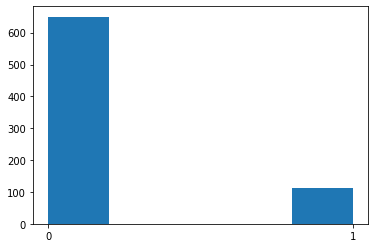

In [41]:
plt.xticks(np.arange(0, 1.1, step=1))
plt.hist(players_df_merged.target,bins=5);

## Split/Scale

- split into train/test
- make sure data is scaled

In [42]:
# Select features
columns=["player_id","player","highest_rank","no_matches","first_rank","n_rank","name_first","name_last","dob","wikidata_id","ioc"]

df = players_df_merged.drop(columns=columns)
X_soln_df = potentials_df_merged.drop(columns=columns).drop(columns=["start_year","current_rank"])

X_soln_df.head()

,top10_win_pc,top50_win_pc,top100_win_pc,win_pc,change_rank,bp_conv_rate,bp_saved_rate,ace_df_ratio,first_serve_pc,first_serve_won_pc,second_serve_won_pc,hand,height
0,0.0,0.071429,0.500000,0.250000,-0.349112,0.347555,0.480590,1.743590,0.605121,0.671086,0.485480,L,NaN
1,0.0,0.000000,0.000000,0.500000,-0.039007,0.691270,0.369444,2.222222,0.651714,0.713742,0.588995,L,193.0
2,0.0,0.166667,0.333333,0.333333,-0.231250,0.490410,0.459028,0.269231,0.606671,0.606934,0.430615,R,NaN
3,0.0,0.125000,0.125000,0.125000,0.446108,0.426488,0.459474,1.500000,0.608184,0.632121,0.469806,R,NaN
4,0.0,0.000000,0.166667,0.500000,-0.040404,0.527778,0.552116,1.750000,0.685483,0.592087,0.537732,R,NaN


In [43]:
#define X,y
X = df.drop("target",axis=1)
y = df.target

X.shape, y.shape

((763, 13), (763,))

In [44]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
#replace missing heights with mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean") 
imputer.fit(X_train[["height"]])
X_train["height"] = imputer.transform(X_train[["height"]])
X_test["height"] = imputer.transform(X_test[["height"]])
X_soln_df["height"] = imputer.transform(X_soln_df[["height"]])

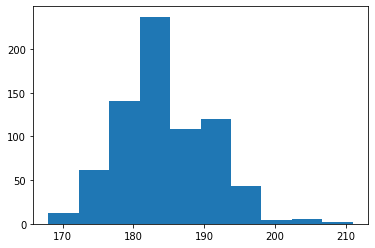

In [46]:
#observe height distribution
plt.hist(df['height']);

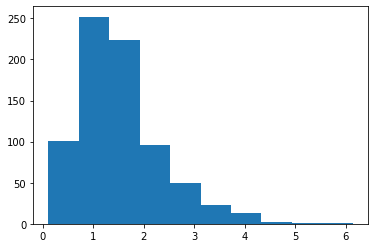

In [47]:
plt.hist(df['ace_df_ratio']);

In [48]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# standardize height
scaler = StandardScaler() 
scaler.fit(X_train[['height']])
X_train['height'] = scaler.transform(X_train[['height']])
X_test['height'] = scaler.transform(X_test[['height']])
X_soln_df['height'] = scaler.transform(X_soln_df[['height']])

#standardize ace/df ratio
scaler = RobustScaler() 
scaler.fit(X_train[['ace_df_ratio']])
X_train['ace_df_ratio'] = scaler.transform(X_train[['ace_df_ratio']])
X_test['ace_df_ratio'] = scaler.transform(X_test[['ace_df_ratio']])
X_soln_df['ace_df_ratio'] = scaler.transform(X_soln_df[['ace_df_ratio']])


In [49]:
X_train[["hand"]] = X_train[["hand"]].applymap(lambda x: 1 if x=="R" else 0)
X_test[["hand"]] = X_test[["hand"]].applymap(lambda x: 1 if x=="R" else 0)
X_soln_df[["hand"]] = X_soln_df[["hand"]].applymap(lambda x: 1 if x=="R" else 0)


In [50]:
X_train

,top10_win_pc,top50_win_pc,top100_win_pc,win_pc,change_rank,bp_conv_rate,bp_saved_rate,ace_df_ratio,first_serve_pc,first_serve_won_pc,second_serve_won_pc,hand,height
417,0.0,0.038462,0.346154,0.346154,0.883919,0.403697,0.542152,0.235923,0.557271,0.683527,0.478537,1,0.048533
39,0.0,0.115385,0.769231,0.384615,0.153846,0.385658,0.551120,-0.393453,0.534956,0.683488,0.476766,1,0.048533
621,0.0,0.076923,0.115385,0.269231,0.000000,0.367780,0.510964,-0.025890,0.651332,0.652178,0.509891,1,0.000000
403,0.0,0.115385,0.500000,0.461538,0.433824,0.442258,0.524492,-0.729758,0.539167,0.730217,0.498651,1,0.048533
426,0.0,0.076923,0.576923,0.423077,0.636792,0.411954,0.611686,-0.677877,0.558675,0.666776,0.492030,1,0.048533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0.0,0.000000,0.115385,0.230769,0.700680,0.304124,0.550264,0.023088,0.584443,0.638021,0.462097,1,-1.857162
285,0.0,0.192308,0.307692,0.461538,0.592760,0.384742,0.535045,-0.464499,0.581714,0.694658,0.467507,1,0.048533
578,0.0,0.076923,0.230769,0.384615,0.738028,0.391320,0.549566,-0.311713,0.530994,0.685467,0.460274,1,-1.063122
511,0.0,0.115385,0.576923,0.153846,0.779661,0.355037,0.539386,0.133410,0.568050,0.687257,0.449048,1,0.048533


In [51]:
#check nan
X_train.isna().sum()

top10_win_pc           0
top50_win_pc           0
top100_win_pc          0
win_pc                 0
change_rank            0
bp_conv_rate           0
bp_saved_rate          0
ace_df_ratio           0
first_serve_pc         0
first_serve_won_pc     0
second_serve_won_pc    0
hand                   0
height                 0
dtype: int64

In [52]:
#check infinite values
X_train.isin([np.inf, -np.inf]).sum()

top10_win_pc           0
top50_win_pc           0
top100_win_pc          0
win_pc                 0
change_rank            0
bp_conv_rate           0
bp_saved_rate          0
ace_df_ratio           0
first_serve_pc         0
first_serve_won_pc     0
second_serve_won_pc    0
hand                   0
height                 0
dtype: int64

## Feature Importance and Cross Validate

- perform cross validation
- see which features are the most important

In [154]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

log_model1 = LogisticRegression(class_weight = {0:1, 1:5})
log_model1.fit(X_train,y_train)
cv_results1 = cross_validate(log_model1, X_train, y_train, cv=5, scoring = ['accuracy','precision','recall'])
cv_results1["test_accuracy"].mean(),cv_results1["test_precision"].mean(),cv_results1["test_recall"].mean()

(0.7847116910597778, 0.3688658393886425, 0.6408333333333334)

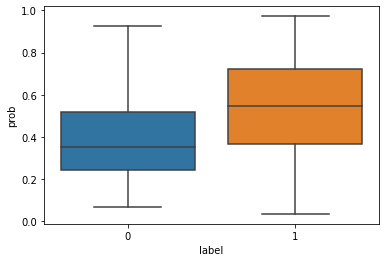

In [54]:
res = pd.DataFrame({'prob':log_model1.predict_proba(X_test)[:,1],
                   'label': y_test})
sns.boxplot(data = res, x = 'label', y = 'prob');

In [165]:
#sorted(log_model1.predict_proba(X_test)[:,1])

<AxesSubplot:>

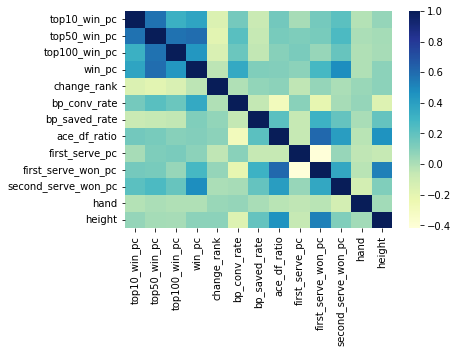

In [166]:
corr = X_train.corr() # Pearson Correlation

# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")


In [167]:
corr = X_train.corr()

corr_df = corr.unstack().reset_index() # Unstack correlation matrix 
corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns
corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation
corr_df[(corr_df['correlation'] >= 0.5) | (corr_df['correlation'] <= -0.5)]

,feature_1,feature_2,correlation
100,ace_df_ratio,first_serve_won_pc,0.607227
124,first_serve_won_pc,ace_df_ratio,0.607227
16,top50_win_pc,win_pc,0.594916
40,win_pc,top50_win_pc,0.594916
27,top100_win_pc,top50_win_pc,0.576668
15,top50_win_pc,top100_win_pc,0.576668
1,top10_win_pc,top50_win_pc,0.573217
13,top50_win_pc,top10_win_pc,0.573217
129,first_serve_won_pc,height,0.523106
165,height,first_serve_won_pc,0.523106


In [168]:
from sklearn.inspection import permutation_importance

permutation_score = permutation_importance(log_model1, X_train, y_train, n_repeats=100)
importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T)
importance_df.columns=['feature','feature_importance']
importance_df=importance_df.sort_values(by="feature_importance", ascending = False).reset_index()
importance_df

,index,feature,feature_importance
0,3,win_pc,0.028858
1,1,top50_win_pc,0.018895
2,12,height,0.009251
3,11,hand,0.007865
4,7,ace_df_ratio,0.002622
5,5,bp_conv_rate,0.001311
6,6,bp_saved_rate,0.000431
7,4,change_rank,-0.000637
8,0,top10_win_pc,-0.001292
9,2,top100_win_pc,-0.00367


In [169]:
feature_remove = [x for i,x in enumerate(list(importance_df.feature)) if importance_df.feature_importance[i]<=0]
feature_remove

['change_rank',
 'top10_win_pc',
 'top100_win_pc',
 'second_serve_won_pc',
 'first_serve_pc',
 'first_serve_won_pc']

## Base Test

- See how well test data performs
- look at learning curve - is the model learning?

In [170]:
y_pred = log_model1.predict(X_test)

In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy, precision, recall

(0.7117903930131004, 0.28169014084507044, 0.5714285714285714)

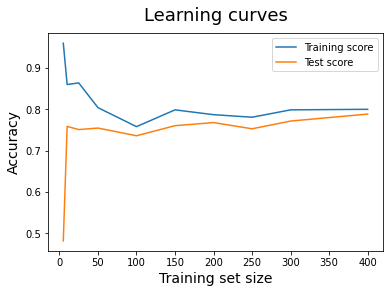

In [125]:
#learning curve
from sklearn.model_selection import learning_curve
train_sizes = [5,10,25,50,100,150,200,250,300,400]

train_sizes_log1, train_scores_log1, test_scores_log1 = learning_curve(
    estimator=log_model1, X=X_train, y=y_train, train_sizes=train_sizes, cv=5)

train_scores_mean1 = np.mean(train_scores_log1, axis=1)
test_scores_mean1 = np.mean(test_scores_log1, axis=1)

plt.plot(train_sizes_log1, train_scores_mean1, label = 'Training score')
plt.plot(train_sizes_log1, test_scores_mean1, label = 'Test score')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();


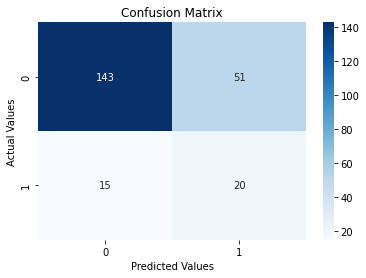

In [131]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

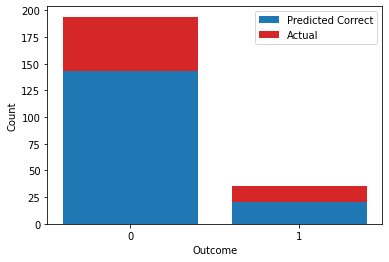

In [143]:
x_val = [0,1]
y_pred_corr = [143,20]
y_actual = [51, 15]
  
# plot bars in stack manner
plt.xticks(np.arange(0, 1.1, step=1))
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.bar(x_val, y_pred_corr, color="tab:blue")
plt.bar(x_val, y_actual, bottom=y_pred_corr, color="tab:red")
plt.legend(["Predicted Correct", "Actual"])

plt.show()

### Solution Predict

Predict potential players

In [62]:
y_soln = log_model1.predict(X_soln_df)

In [63]:
y_soln

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [64]:
#likelihood of each player
pdf1 = pd.DataFrame(potentials_df_merged.player)
y_base = log_model1.predict_proba(X_soln_df)
y_base_1 = [y[1] for y in y_base]
pdf1["likelihood"] = pd.DataFrame(y_base_1)
pdf1["prediction"] = pd.DataFrame(y_soln)
(pdf1.sort_values(by="likelihood",ascending=False)).to_csv("result.csv")

In [65]:
pdf1.sort_values(by="likelihood",ascending=False).head()

,player,likelihood,prediction
25,Vit Kopriva,0.599865,1
18,Aleksandar Vukic,0.577269,1
33,Dominic Stricker,0.541588,1
17,Max Purcell,0.507463,1
9,Juan Pablo Varillas,0.484833,0


In [66]:
#model features
features = pd.DataFrame(X_soln_df.columns)
features = features.rename(columns={0:"feature"})
features["coef"]=list((log_model1.coef_)[0])
features

,feature,coef
0,top10_win_pc,1.833381
1,top50_win_pc,2.165507
2,top100_win_pc,0.385180
3,win_pc,3.915471
4,change_rank,0.165754
5,bp_conv_rate,1.756432
6,bp_saved_rate,-0.494456
7,ace_df_ratio,0.182679
8,first_serve_pc,-0.435291
9,first_serve_won_pc,0.664131


## Adjust Threshold

Default threshold is 0.5. We can adjust threshold so model can predict more players to succeed

In [67]:
def custom_predict(X, model, custom_threshold):
    probs = model.predict_proba(X) 
    top10_probs = probs[:, 1] 
    result = top10_probs > custom_threshold
    return result.astype(int)

In [68]:
new_threshold=0.3
log_model_t = LogisticRegression(class_weight = {0:1, 1:5})
log_model_t.fit(X_train, y_train)

y_pred_t = custom_predict(X=X_test, model=log_model_t, custom_threshold=new_threshold)

accuracy_t = accuracy_score(y_test, y_pred_t)
precision_t = precision_score(y_test, y_pred_t)
recall_t = recall_score(y_test, y_pred_t)
accuracy_t, precision_t, recall_t

(0.462882096069869, 0.19863013698630136, 0.8285714285714286)

In [69]:
y_soln_t = custom_predict(X=X_soln_df, model=log_model_t,custom_threshold=new_threshold) 
y_soln_t

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [70]:
#likelihood of each player
pdf_t = pd.DataFrame(potentials_df_merged.player)
y_t = log_model_t.predict_proba(X_soln_df)
y_t_1 = [y[1] for y in y_t]
pdf_t["likelihood"] = pd.DataFrame(y_t_1)
pdf_t.sort_values(by="likelihood",ascending=False).head()

,player,likelihood
25,Vit Kopriva,0.599865
18,Aleksandar Vukic,0.577269
33,Dominic Stricker,0.541588
17,Max Purcell,0.507463
9,Juan Pablo Varillas,0.484833


In [71]:
#model features
features_t = pd.DataFrame(X_soln_df.columns)
features_t = features_t.rename(columns={0:"feature"})
features_t["coef"]=list((log_model_t.coef_)[0])
features_t

,feature,coef
0,top10_win_pc,1.833381
1,top50_win_pc,2.165507
2,top100_win_pc,0.385180
3,win_pc,3.915471
4,change_rank,0.165754
5,bp_conv_rate,1.756432
6,bp_saved_rate,-0.494456
7,ace_df_ratio,0.182679
8,first_serve_pc,-0.435291
9,first_serve_won_pc,0.664131


### Simplify model

Remove features that are: 
- least important
- dependent amongst other features and therefore not required

In [92]:
simplify = ["first_serve_won_pc","top10_win_pc","top50_win_pc","top100_win_pc"]+feature_remove
X_train_s = X_train.drop(columns=simplify)
X_test_s = X_test.drop(columns=simplify)
X_soln_df_s = X_soln_df.drop(columns=simplify)

In [93]:
log_model_s = LogisticRegression(class_weight = {0:1, 1:5})
log_model_s.fit(X_train_s,y_train)
base_score_s = cross_validate(log_model_s, X_train_s, y_train, cv=5)['test_score'].mean()
base_precision_s = cross_validate(log_model_s, X_train_s, y_train, cv=5, 
                            scoring=['precision'])['test_precision'].mean()
base_score_s, base_precision_s

(0.745371186739552, 0.3034782608695652)

In [96]:
y_pred_s = custom_predict(X=X_test_s, model=log_model_s,custom_threshold=0.5) 

In [99]:
accuracy_s = accuracy_score(y_test, y_pred_s)
precision_s = precision_score(y_test, y_pred_s)
recall_s = recall_score(y_test, y_pred_s)
accuracy_s, precision_s, recall_s

(0.6724890829694323, 0.23684210526315788, 0.5142857142857142)

In [106]:
y_soln_s = custom_predict(X=X_soln_df_s, model=log_model_s,custom_threshold=0.5) 
potentials_df_merged[y_soln_s.astype(bool)].player

1          Roberto Quiroz
4      Ricardo Ojeda Lara
9     Juan Pablo Varillas
17            Max Purcell
18       Aleksandar Vukic
25            Vit Kopriva
33       Dominic Stricker
Name: player, dtype: object

In [107]:
#likelihood of each player
pdf_s = pd.DataFrame(potentials_df_merged.player)
y_s = log_model_s.predict_proba(X_soln_df_s)
y_s_1 = [y[1] for y in y_s]
pdf_s["likelihood"] = pd.DataFrame(y_s_1)
pdf_s["prediction"] = pd.DataFrame(y_soln_s)
pdf_s.sort_values(by="likelihood",ascending=False).to_csv("result_s.csv")


In [108]:
#model features
features_s = pd.DataFrame(X_soln_df_s.columns)
features_s = features_s.rename(columns={0:"feature"})
features_s["coef"]=list((log_model_s.coef_)[0])
features_s

,feature,coef
0,win_pc,5.368139
1,bp_conv_rate,2.076761
2,bp_saved_rate,-0.795946
3,ace_df_ratio,0.290950
4,hand,0.851773
5,height,0.262262


# Chosen Player

In [79]:
player = "Vit Kopriva"
index = 25

In [80]:
player_stats = potentials_df_merged.loc[index,:]
player_stats

player_id                   200240
player                 Vit Kopriva
highest_rank                 193.0
start_year                    2021
current_rank                 193.0
no_matches                       6
top10_win_pc              0.166667
top50_win_pc              0.166667
top100_win_pc             0.333333
win_pc                    0.666667
first_rank                   249.0
n_rank                       193.0
change_rank                 0.2249
bp_conv_rate              0.590909
bp_saved_rate             0.297619
ace_df_ratio                  0.75
first_serve_pc            0.528859
first_serve_won_pc        0.757704
second_serve_won_pc       0.526542
name_first                     Vit
name_last                  Kopriva
hand                             U
dob                       19970615
ioc                            CZE
height                         NaN
wikidata_id             Q102423530
Name: 25, dtype: object

In [81]:
win_stats = combined_df[combined_df.winner_name==player]
loss_stats = combined_df[combined_df.loser_name==player] 

In [82]:
player_soln_df = pd.concat((win_stats,loss_stats),axis=0).reset_index().drop(columns="index")\
                .sort_values(by="tourney_date")

player_soln_df["win"] = player_soln_df.winner_name==player
player_soln_df["loss"] = player_soln_df.loser_name==player

In [83]:
player_soln_df["ranking"] = player_soln_df.win*player_soln_df.winner_rank + \
                            player_soln_df.loss*player_soln_df.loser_rank

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


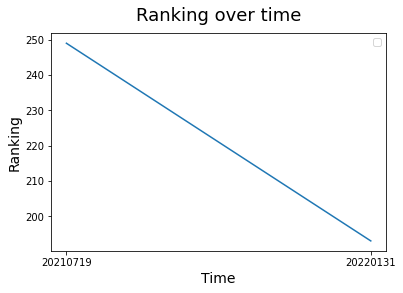

In [84]:
plt.ticklabel_format(style = 'plain')
plt.ylabel('Ranking', fontsize = 14)
plt.xlabel('Time', fontsize = 14)
plt.title('Ranking over time', fontsize = 18, y = 1.03)
plt.legend();
x_rank = player_soln_df.tourney_date.map(str)
plt.plot(x_rank,player_soln_df.ranking)

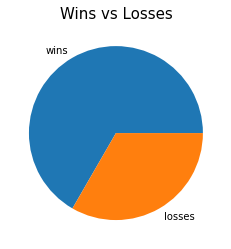

In [85]:
x_win=[player_stats.win_pc,1-player_stats.win_pc]
x_win_labels = ["wins","losses"]
plt.title('Wins vs Losses', fontsize = 15)
plt.pie(x_win,labels=x_win_labels);

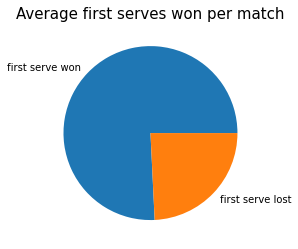

In [86]:
x_win=[player_stats.first_serve_won_pc,1-player_stats.first_serve_won_pc]
x_win_labels = ["first serve won","first serve lost"]
plt.title('Average first serves won per match', fontsize = 15)
plt.pie(x_win,labels=x_win_labels);